# Roboporter - 2016

## R1

## Motion Path Calculation

Module imports

In [27]:
import numpy
import copy
import time
#import plotly as plt
#import plotly.graph_objs as go

import matplotlib as mpl
from matplotlib import pyplot

In [28]:
recPenalty = 0.8
momentumBonus = 0.1
tempX = 0
tempY = 0

In [29]:
class agent:

    locX = 0
    locY = 0
    dist = 0
    destX = 0
    destY = 0
    envScore = []
    distScore = []
    score = []
    pathmemory = []
    alpha = 1
    beta = 10

    def __init__(self):
        locX = 0
        locY = 0
        dist = 0
        destX = 0
        destY = 0

    def moveFwd(self):
        self.locX -= 1

    def moveBack(self):
        self.locX += 1

    def moveLeft(self):
        self.locY -= 1

    def moveRight(self):
        self.locY += 1

    def finddist(self):
        self.dist = numpy.sqrt(numpy.square(self.locX - self.destX) + numpy.square(self.locY - self.destY))
        return self.dist

    def setpos(self, x, y):
        self.locY = y
        self.locX = x

    def setdest(self, x, y):
        self.destY = y
        self.destX = x

    def move(self, to, rev):

        if to == 0:
            if rev:
                self.moveBack()
            else:
                self.moveFwd()
        elif to == 1:
            if rev:
                self.moveFwd()
            else:
                self.moveBack()
        elif to == 2:
            if rev:
                self.moveLeft()
            else:
                self.moveRight()
        elif to == 3:
            if rev:
                self.moveRight()
            else:
                self.moveLeft()

    def checkquad(self, envmap):
        self.checkdist()
        self.envCheck(envmap)
        self.calcHeuristic()

    def checkdist(self):
        self.distScore = []
        for motion in range(0, 4):
            self.move(motion, 0)
            self.distScore.append(self.finddist())
            self.move(motion, 1)
        print("dist score is " + str(self.distScore))
        print("min dist score is " + str(min(self.distScore)) + " and its at " +
              str(self.distScore.index(min(self.distScore))))
        return self.distScore.index(min(self.distScore))

    def envCheck(self, envmap):
        self.envScore = []
        for motion in range(0, 4):
            self.move(motion, 0)
            if 0 <= self.locX < len(envmap) and 0 <= self.locY < len(envmap[1]):
                self.envScore.append(envmap[self.locX][self.locY])
            else:
                self.envScore.append(-10000)
            self.move(motion, 1)
        print("environment score is " + str(self.envScore))
        print("max env score is " + str(max(self.envScore)) + " and its at " +
              str(self.envScore.index(max(self.envScore))))
        return self.envScore.index(min(self.envScore))

    def calcHeuristic(self):
        self.score = []
        for i in range(0, 4):
            if self.distScore[i] != 0:
                self.score.append(self.alpha*self.envScore[i] + self.beta/self.distScore[i])
            else:
                self.score.append(self.alpha * self.envScore[i]+1)
            if self.envScore[i] == -10000:
                self.score[i] = -10000

        if len(self.pathmemory) != 0:
            print("momentum bonus in the ", self.pathmemory[len(self.pathmemory)-1], "direction")
            self.score[self.pathmemory[len(self.pathmemory)-1]] = self.score[self.pathmemory[len(self.pathmemory)-1]] + momentumBonus
        else:
            print('start of run, no momentum bonus')

        print("heuristic score is " + str(self.score))
        print("max heuristic score is " + str(max(self.score)) + " and its at " +
              str(self.score.index(max(self.score))))
        return self.score.index(max(self.score))

In [30]:
def onclick(event):
    global tempX
    global tempY
    print('button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          (event.button, event.x, event.y, event.xdata, event.ydata))
    tempX = event.xdata
    tempY = event.ydata
    pyplot.close()

In [31]:
def putmarker(motion):
    if motion == 0:
        return "^"
    elif motion == 1:
        return "b"
    elif motion == 2:
        return ">"
    elif motion == 3:
        return "<"

In [32]:
A = [[-10, 000, -10, 000, 000, 000, 000, -10, 000, -10, 000, 000, -10, 000, -10, 000, 000, 000, -10, -10],
     [-10, 000, -10, -10, -10, -10, -10, -10, 000, -10, -10, 000, -10, 000, -10, 000, 000, -10, -10, -10],
     [-10, 000, 000, 000, 000, 000, 000, -10, 000, 000, 000, 000, 000, 000, 000, 000, 000, 000, 000, 000],
     [-10, 000, -10, -10, -10, -10, 000, -10, 000, -10, 000, 000, 000, -10, 000, 000, 000, 000, 000, -10],
     [-10, 000, -10, 000, 000, -10, 000, -10, 000, -10, 000, -10, -10, -10, -10, -10, -10, 000, 000, 000],
     [-10, 000, -10, 000, 000, -10, 000, -10, 000, 000, 000, -10, 000, -10, 000, 000, 000, 000, 000, -10],
     [-10, 000, -10, 000, 000, -10, 000, -10, 000, -10, -10, -10, 000, -10, 000, 000, 000, 000, -10, -10],
     [-10, 000, -10, 000, 000, -10, 000, -10, 000, -10, 000, 000, 000, -10, 000, 000, 000, 000, 000, -10],
     [-10, 000, -10, -10, -10, -10, 000, -10, 000, -10, 000, -10, 000, -10, -10, -10, -10, 000, 000, 000],
     [-10, 000, 000, 000, 000, 000, 000, 000, 000, 000, 000, 000, 000, 000, 000, 000, 000, 000, 000, -10],
     [-10, -10, -10, 000, -10, -10, -10, -10, -10, 000, -10, 000, 000, 000, 000, -10, 000, 000, -10, 000],
     [-10, -10, -10, 000, -10, 000, 000, 000, -10, 000, 000, 000, 000, 000, 000, -10, 000, -10, -10, 000],
     [-10, -10, -10, 000, -10, 000, 000, -10, -10, -10, 000, 000, -10, 000, 000, -10, 000, 000, -10, 000],
     [-10, 000, 000, 000, -10, 000, -10, -10, 000, 000, 000, 000, -10, 000, 000, -10, -10, -10, -10, 000],
     [-10, 000, 000, 000, 000, 000, 000, 000, 000, -10, 000, 000, -10, 000, 000, 000, 000, 000, 000, 000],
     [-10, 000, 000, 000, -10, -10, -10, 000, -10, 000, 000, 000, -10, 000, 000, 000, -10, -10, 000, 000],
     [-10, 000, 000, 000, -10, -10, -10, 000, -10, -10, 000, -10, -10, -10, 000, 000, 000, -10, 000, 000],
     [-10, -10, -10, -10, -10, -10, 000, 000, -10, 000, 000, 000, -10, 000, 000, 000, 000, 000, 000, 000],
     [-10, 000, 000, 000, 000, 000, 000, 000, -10, -10, 000, 000, 000, 000, -10, -10, 000, -10, 000, 000],
     [-10, -10, -10, -10, -10, -10, -10, -10, -10, 000, 000, 000, 000, 000, -10, -10, 000, -10, 000, 000]]

C = [[000, 000, 000, 000, 000, 000, 000, 000, 000, 000],
     [000, -10, -10, -10, 000, -10, -10, -10, 000, 000],
     [000, -10, 000, 000, 000, 000, 000, -10, 000, 000],
     [000, -10, 000, -10, -10, -10, 000, -10, 000, 000],
     [000, -10, 000, -10, 000, -10, 000, -10, 000, 000],
     [000, -10, 000, -10, 000, -10, 000, -10, 000, 000],
     [0, -10, 000, 000, 000, 000, 000, -10, 000, 000],
     [0, -10, -10, -10, -10, -10, -10, -10, 000, 000],
     [000, 000, 000, 000, 000, 000, 000, 000, 000, 000],
     [ 0, -10, -10, -10, 00, -10, -10, -10, -10, -10]]

D = [[-10, 000, -10, 000, 000, 000, 000, -10, 000, 000],
     [-10, 000, -10, -10, -10, -10, -10, -10, 000, 000],
     [-10, 000, 000, 000, 000, 000, 000, -10, 000, 000],
     [-10, 000, -10, -10, -10, -10, 000, -10, 000, 000],
     [-10, 000, -10, 000, 000, -10, 000, -10, 000, 000],
     [-10, 000, -10, 000, 000, -10, 000, -10, 000, 000],
     [-10, 000, -10, 000, 000, -10, 000, -10, 000, 000],
     [-10, 000, -10, -10, -10, -10, 000, -10, 000, 000],
     [-10, 000, 000, 000, 000, 000, 000, 000, 000, 000],
     [-10, -10, -10, -10, -10, -10, -10, -10, -10, -10]]

In [33]:
Abase = copy.deepcopy(A)

In [34]:
cat = agent()

In [1]:
fig = mpl.pyplot.figure()
cmap = mpl.colors.ListedColormap(['gray','magenta','cyan','blue', 'green', 'black', 'red'])
bounds=[-100,-9,-3*float(recPenalty), -2*float(recPenalty), -1*float(recPenalty), 0, 2, 6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
pyplot.grid(True,color='white', which='both')

# tell imshow about color map so that only set colors are used
img = mpl.pyplot.imshow(A, interpolation='nearest', cmap = cmap,norm=norm)

cid = fig.canvas.mpl_connect('button_press_event', onclick)
mpl.pyplot.show()

NameError: name 'mpl' is not defined

In [36]:
tempX = 5
tempY = 2

In [37]:
cat.setdest(int(round(tempY)),int(round(tempX)))
A[cat.destX][cat.destY] = 1000

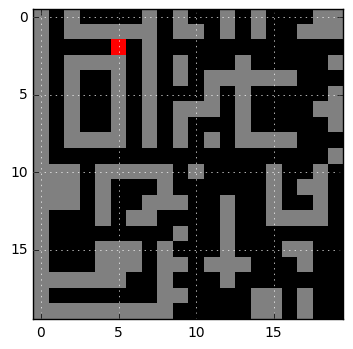

In [38]:
fig = mpl.pyplot.figure()
pyplot.grid(True,color='white', which='both')
img = mpl.pyplot.imshow(A, interpolation='nearest', cmap = cmap,norm=norm)
cid = fig.canvas.mpl_connect('button_press_event', onclick)

mpl.pyplot.show()

In [39]:
tempX = 19
tempY = 19

In [40]:
cat.setpos(int(round(tempY)),int(round(tempX)))

In [41]:
motionPath = copy.deepcopy(A)
start = time.time()

In [42]:
print("The current environment...")
i = 0
for row in A:
    print(A[i])
    i += 1

The current environment...
[-10, 0, -10, 0, 0, 0, 0, -10, 0, -10, 0, 0, -10, 0, -10, 0, 0, 0, -10, -10]
[-10, 0, -10, -10, -10, -10, -10, -10, 0, -10, -10, 0, -10, 0, -10, 0, 0, -10, -10, -10]
[-10, 0, 0, 0, 0, 1000, 0, -10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10, 0, -10, -10, -10, -10, 0, -10, 0, -10, 0, 0, 0, -10, 0, 0, 0, 0, 0, -10]
[-10, 0, -10, 0, 0, -10, 0, -10, 0, -10, 0, -10, -10, -10, -10, -10, -10, 0, 0, 0]
[-10, 0, -10, 0, 0, -10, 0, -10, 0, 0, 0, -10, 0, -10, 0, 0, 0, 0, 0, -10]
[-10, 0, -10, 0, 0, -10, 0, -10, 0, -10, -10, -10, 0, -10, 0, 0, 0, 0, -10, -10]
[-10, 0, -10, 0, 0, -10, 0, -10, 0, -10, 0, 0, 0, -10, 0, 0, 0, 0, 0, -10]
[-10, 0, -10, -10, -10, -10, 0, -10, 0, -10, 0, -10, 0, -10, -10, -10, -10, 0, 0, 0]
[-10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -10]
[-10, -10, -10, 0, -10, -10, -10, -10, -10, 0, -10, 0, 0, 0, 0, -10, 0, 0, -10, 0]
[-10, -10, -10, 0, -10, 0, 0, 0, -10, 0, 0, 0, 0, 0, 0, -10, 0, -10, -10, 0]
[-10, -10, -10, 0, -10, 0, 0, -10, -

In [43]:
# go to X from S
# actions are LRFR
path = []
nodeList = [[], []]

In [44]:
print("Cat is at " + str(cat.locX) + "," + str(cat.locY) + " at a distance " + "{0:.2f}".format(cat.dist) + " to goal")
motionPath[cat.locX][cat.locY] = "X"
nodeList[0].append(cat.locX)
nodeList[1].append(cat.locY)

Cat is at 19,19 at a distance 0.00 to goal


In [45]:
print("Motion Path... ")
i = 0
for row in motionPath:
    print(motionPath[i])
    i += 1

Motion Path... 
[-10, 0, -10, 0, 0, 0, 0, -10, 0, -10, 0, 0, -10, 0, -10, 0, 0, 0, -10, -10]
[-10, 0, -10, -10, -10, -10, -10, -10, 0, -10, -10, 0, -10, 0, -10, 0, 0, -10, -10, -10]
[-10, 0, 0, 0, 0, 1000, 0, -10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10, 0, -10, -10, -10, -10, 0, -10, 0, -10, 0, 0, 0, -10, 0, 0, 0, 0, 0, -10]
[-10, 0, -10, 0, 0, -10, 0, -10, 0, -10, 0, -10, -10, -10, -10, -10, -10, 0, 0, 0]
[-10, 0, -10, 0, 0, -10, 0, -10, 0, 0, 0, -10, 0, -10, 0, 0, 0, 0, 0, -10]
[-10, 0, -10, 0, 0, -10, 0, -10, 0, -10, -10, -10, 0, -10, 0, 0, 0, 0, -10, -10]
[-10, 0, -10, 0, 0, -10, 0, -10, 0, -10, 0, 0, 0, -10, 0, 0, 0, 0, 0, -10]
[-10, 0, -10, -10, -10, -10, 0, -10, 0, -10, 0, -10, 0, -10, -10, -10, -10, 0, 0, 0]
[-10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -10]
[-10, -10, -10, 0, -10, -10, -10, -10, -10, 0, -10, 0, 0, 0, 0, -10, 0, 0, -10, 0]
[-10, -10, -10, 0, -10, 0, 0, 0, -10, 0, 0, 0, 0, 0, 0, -10, 0, -10, -10, 0]
[-10, -10, -10, 0, -10, 0, 0, -10, -10, -10, 0,

In [46]:
while True:
    if cat.locX == cat.destX and cat.locY == cat.destY:
        finish = time.time()
        duration = finish - start
        print("it took " + str(duration) + " to finish the navigation")
        break

    cat.checkquad(A)
    path.append(cat.score.index(max(cat.score)))
    cat.pathmemory.append(cat.score.index(max(cat.score)))
    motionPath[cat.locX][cat.locY] = putmarker(int(path[len(path)-1]))
    A[cat.locX][cat.locY] = A[cat.locX][cat.locY] - recPenalty

    #print("The current environment...")
    #i = 0
    #for row in A:
    #    print(A[i])
    #    i += 1

    cat.move(path[len(path)-1], 0)
    motionPath[cat.locX][cat.locY] = "X"
    nodeList[0].append(cat.locX)
    nodeList[1].append(cat.locY)
    #print("Motion Path... ")
    #i = 0
    #for row in motionPath:
    #    print(motionPath[i])
    #   i += 1

    print("Cat is at " + str(cat.locX) + "," + str(cat.locY) + " at a distance " + "{0:.2f}".format(
        cat.dist) + " to goal")
    print("path is " + str(len(path)) + " steps long - " + str(path))
    print("__________________________________________")

dist score is [21.2602916254693, 22.803508501982758, 22.671568097509269, 21.400934559032695]
min dist score is 21.2602916255 and its at 0
environment score is [0, -10000, -10000, 0]
max env score is 0 and its at 0
start of run, no momentum bonus
heuristic score is [0.47036043419179863, -10000, -10000, 0.46726931351599776]
max heuristic score is 0.470360434192 and its at 0
Cat is at 18,19 at a distance 21.40 to goal
path is 1 steps long - [0]
__________________________________________
dist score is [20.518284528683193, 22.022715545545239, 21.931712199461309, 20.615528128088304]
min dist score is 20.5182845287 and its at 0
environment score is [0, -0.8, -10000, 0]
max env score is 0 and its at 0
('momentum bonus in the ', 0, 'direction')
heuristic score is [0.58737017882857934, -0.34592339081350021, -10000, 0.48507125007266594]
max heuristic score is 0.587370178829 and its at 0
Cat is at 17,19 at a distance 20.62 to goal
path is 2 steps long - [0, 0]
_____________________________________

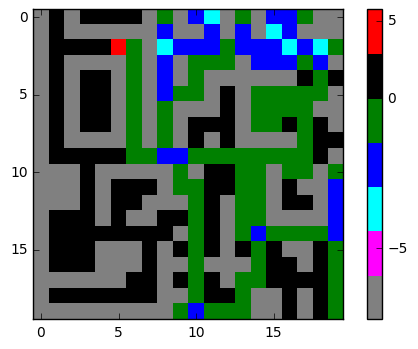

In [47]:
img2 = mpl.pyplot.imshow(A, interpolation='nearest',cmap=cmap, norm=norm)
mpl.pyplot.colorbar(img2, cmap=cmap, norm=norm, boundaries=bounds, ticks=[-5, 0, 5])
mpl.pyplot.show()